In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
death_2021 = pd.read_csv("주야별_교통사고_20230320214415.csv", encoding="cp949")
death_2021 = death_2021.to_numpy()

death_2021 = death_2021[2:, 1:].astype(np.int64)
print(death_2021)

[[107  90]
 [107  96]
 [128  81]
 [119  93]
 [154 101]
 [124 103]
 [139 115]
 [129 118]
 [131 115]
 [156 156]
 [163 122]
 [149 120]]


 #### value
 #### scalar(1D) ---> vector(2D) ---> matrix(3D) ---> tensor(4D+)

 

[[107  90]
 [107  96]
 [128  81]
 [119  93]
 [154 101]
 [124 103]
 [139 115]
 [129 118]
 [131 115]
 [156 156]
 [163 122]
 [149 120]]


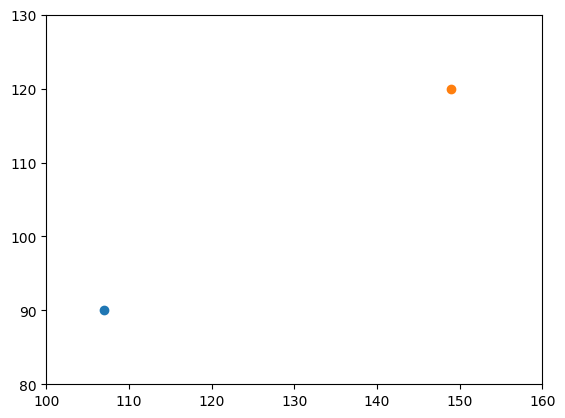

In [3]:
print(death_2021)

_, axe = plt.subplots()

# 축 간격 조정
axe.set_ylim(80, 130)
axe.set_xlim(100,160)

# x축 : 주간, y축 : 야간
axe.scatter(death_2021[0,0], death_2021[0,1]) # 첫번째 주간, 야간값
axe.scatter(death_2021[-1,0], death_2021[-1,1]) # 마지막 주간, 야간값

$ euclidean - dist = \sqrt ( (a_x - b_x)^2 + (a_y - b_y )^2 ) = ( (a_x - b_x)^2 + (a_y - b_y )^2 ) ^ {1/2}$

$ manhattan  - dist = \left| (a_x - b_x) \right| + \left| (a_y - b_y) \right| $

$ minkowski - dist = (\left| (a_x - b_x) \right| ^ p + \left| (a_y - b_y) \right| ^ p) ^ {1/p} $

In [4]:
# norm : vector를 scalar 값으로 표현

# L1 norm : manhattan dist
a = death_2021[0]
print(a)
l1_norm = np.sum(np.abs(a))
print(l1_norm)

# L2 norm : euclidean norm
a = death_2021[0]
print(a)
l2_norm = np.sqrt(np.sum(a**2))
print(l2_norm)

[107  90]
197
[107  90]
139.8177385026664


##### 내적(Dot product)
$ a \cdot b = (a_x \times b_x) + (a_y \times b_y) = \vert a \vert \vert b \vert cos \theta$

In [5]:
a = death_2021[0]
b = death_2021[-1]

# 각이 90이 나오는지 확인하는 용도
a = np.array([0, 5])
b = np.array([5, 0])

print(a)
print(b)

print(np.dot(a,b))
# print(107*149+90*120)

dot_prod = np.dot(a, b)
a_norm = np.sqrt(np.sum(a**2))
b_norm = np.sqrt(np.sum(b**2))

rad_angle = np.arccos(dot_prod/(a_norm * b_norm))
print(np.rad2deg(rad_angle))

[0 5]
[5 0]
0
90.0


In [6]:
# SVD(Singular Value Decomposition) => 소인수분해 기법
# PCA(Principal Component Analysis) => demension reduction(차원 축소) 기법 중 하나

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

np_data = pd.read_csv(url, header=None).to_numpy()
np_data = np_data[:,1:].astype(np.float64)

# print(np_data)

# SVD
# 소인수분해 ex> 24 = 2 * 3 * 4
x = np.linalg.svd(np_data)
print(x, len(x))


# _, axe = plt.subplots()
# axe.scatter(np_data[:,0], np_data[:, 1])

(array([[-2.20692305e-02, -2.86693290e-02, -1.52782099e-02, ...,
        -1.70295285e-02, -1.77496374e-02, -2.04245636e-02],
       [-1.03132722e-02, -1.24097637e-02,  1.26816152e-02, ...,
         5.75382650e-03, -3.06270177e-03,  2.64024721e-03],
       [-1.33309493e-02, -2.05791386e-03,  1.46215653e-02, ...,
         2.82316376e-02, -1.05710256e-02,  4.50475083e-03],
       ...,
       [-1.34228236e-02,  1.66918459e-02,  8.45125584e-03, ...,
         9.98226069e-01, -2.98478114e-04, -2.39963780e-04],
       [-1.48754085e-02,  1.10892193e-02,  9.15315112e-03, ...,
        -2.77586951e-04,  9.99048176e-01, -4.85348546e-04],
       [-1.79465847e-02,  3.47193014e-02, -1.60444566e-02, ...,
        -1.78609411e-04, -4.96539108e-04,  9.96810487e-01]]), array([679.44804626,  31.68664549,   8.42923506,   3.31568665,
         2.0951808 ,   1.42890475,   1.33429837,   0.79601659]), array([[-4.94227407e-02, -3.86187473e-02, -1.33215105e-02,
        -8.29573747e-02, -3.53521606e-02, -1.80040147e